In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

[0.00000000e+00 5.05050763e-05 5.55555839e-04 ... 5.99856061e+01
 5.99956061e+01 6.00000000e+01]
0
True
[[ 0.00000000e+00  9.99949495e-04  1.09994444e-02 ...  1.18765441e+03
   1.18785240e+03  1.18793939e+03]
 [ 0.00000000e+00  3.25308325e-17  3.93491933e-15 ...  5.20476737e-08
   5.20476702e-08  5.20476687e-08]
 [ 1.97989899e+01  1.97989899e+01  1.97989899e+01 ...  1.97989899e+01
   1.97989899e+01  1.97989899e+01]
 [ 0.00000000e+00  1.28819890e-12  1.41631055e-11 ... -3.49539575e-13
  -3.49539575e-13 -3.49539575e-13]]


<IPython.core.display.Javascript object>


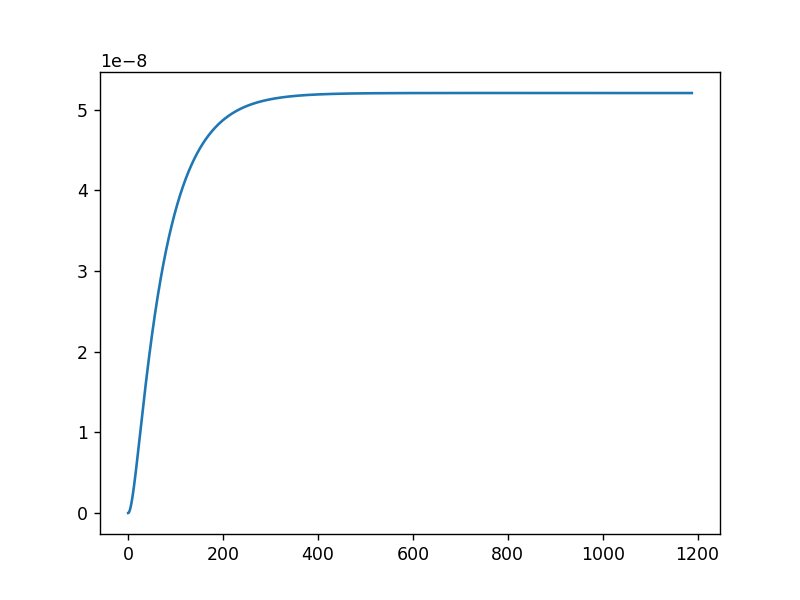

In [3]:
"""
    kd = drag coefficient
    klp = primary lift coefficient
    kls = secondary lift coefficient
    m = mass of the plane (kg)
    g = gravitational constant (9.8 m/s^2)
    T = thrust of the plane
    
"""

kd = .5
klp = .5
kls = 0
m = 20
g = 9.8
T = 392

# element 1: the ODE function
def ode(t, z):
    # np.arctan might be problematic?
    cos = z[2] / np.sqrt(z[2]**2 + z[3]**2)
    sin = z[3] / np.sqrt(z[2]**2 + z[3]**2)
    
    zX = (1/m) * ( (z[2]**2 + z[3]**2) * ( (-kd - klp - kls) * cos 
                + (-klp - kls) * sin ) + T * cos)
    zY = (1/m) * ( (z[2]**2 + z[3]**2) * ( (klp + kls) * cos
                + (-kd - klp - kls) * sin ) + T * sin - m * g )
    
    return np.array([z[2], z[3], zX, zY])

# element 2: the time domain
t_span = (0, 60)

# element 3: the initial conditions
y0 = np.array([0, 0, 19.79898989898989898, 0])

# solve the system
# max_step is an optional parameter that controls maximum step size and
# a smaller value will result in a smoother graph
sol = solve_ivp(ode, t_span, y0, max_step=0.01)
print(sol.t)
print(sol.status)
print(sol.success)
print(sol.y)

# graph the solution
plt.plot(sol.y[0], sol.y[1])
#plt.xlabel('t')
#plt.ylabel('y(t)')
#plt.title("solve_ivp")
plt.show()

#plt.plot(sol.y[2], sol.y[3])
#plt.show()